In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
# data = pd.read_csv('nyc.csv')

# # Inspect data
# print(data.info())

# # Convert the date column to datetime64
# data.date=pd.to_datetime(data.date)

# # Set date column as index
# data.set_index('date', inplace=True)

# # Inspect data 
# print(data.info())

# # Plot data
# data.plot(subplots=True)
# plt.show()

In [3]:
# # yahoo.head()

# #             price
# # date             
# # 2013-01-02  20.08
# # 2013-01-03  19.78
# # 2013-01-04  19.86
# # 2013-01-07  19.40
# # 2013-01-08  19.66

# prices = pd.DataFrame()

# # Select data for each year and concatenate with prices here 
# for year in ['2013', '2014', '2015']:
#     price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
#     price_per_year.rename(columns={'price': year}, inplace=True)
#     prices = pd.concat([prices, price_per_year], axis=1)

# # Plot prices

# prices.plot()
# plt.show()

# prices.head()

# # output

# #    2013   2014   2015
# # 0  20.08    NaN    NaN
# # 1  19.78  39.59  50.17
# # 2  19.86  40.12  49.13
# # 3  19.40  39.93  49.21
# # 4  19.66  40.92  48.59

In [4]:
# df = df.asfreq('M')

In [5]:
# pd.DataFrame.div()
# pd.read_csv()
# pd.DataFrame.pct_change()

In [6]:
# import itertools
# p=d=q=range(0,5)
# pdq=list(itertools.product(p,d,q))
# len(pdq)


# import warnings
# warnings.filterwarinings('ignore')
# for param in pdq:
#     try:
#         model_arima = ARIMA(train, order=param)
#         model_arima_fit = model_arima.fit()
#         print(param,model_arima_fit.aic)
#     except:
#         continue

In [7]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
df = pd.read_csv(url, header=0, parse_dates=[0], index_col=[0])
print(df.head())

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [9]:
#df.plot()

In [10]:
import plotly.express as px

fig= px.line(df )
fig.show()

In [11]:
import chart_studio.plotly as py


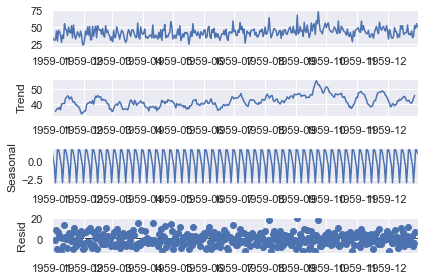

In [12]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df, model='additive')
result.plot()
pyplot.show()

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

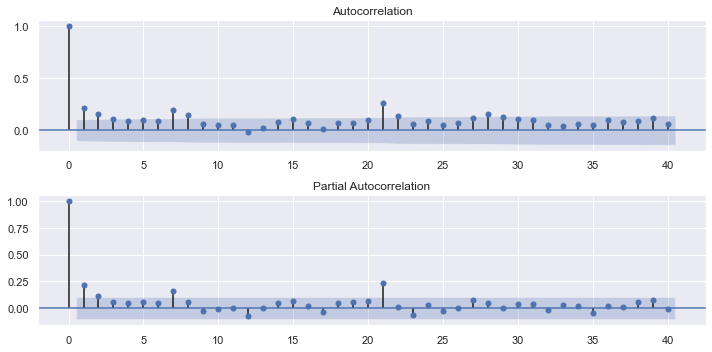

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(2,1,figsize=(10,5))
plot_acf(df, lags=40, ax=ax[0])
plot_pacf(df, lags=40, ax=ax[1])
plt.tight_layout()


In [15]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [16]:
diff = df.diff(1).dropna()
print(diff.head())

fig= px.line(diff )
fig.show()

            Births
Date              
1959-01-02    -3.0
1959-01-03    -2.0
1959-01-04     1.0
1959-01-05    13.0
1959-01-06   -15.0


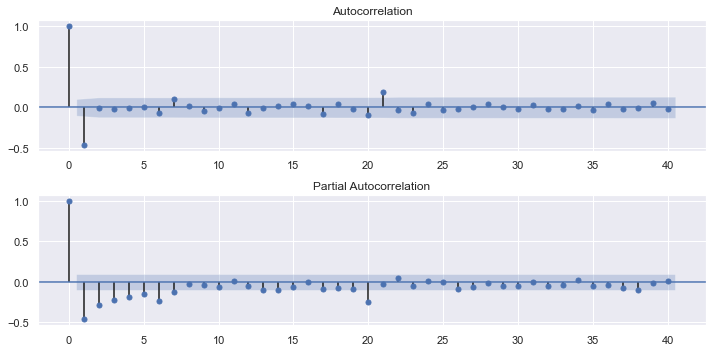

In [17]:
fig, ax = plt.subplots(2,1,figsize=(10,5))
plot_acf(diff, lags=40, ax=ax[0])
plot_pacf(diff, lags=40, ax=ax[1])
plt.tight_layout()


In [18]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.625179
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [19]:
# dflog = np.log(df)
# df = np.exp(dflog)

In [20]:
#diff.rolling(7).mean().plot()

## Try SARIMA model

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

In [22]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in pdq]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
print(pdq)
# print(seasonal_pdq)

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)
[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [23]:
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(df,order=param,seasonal_order=param_seasonal)
            results = mod.fit()
            print('ARIMA{}x{}7 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:3776.9759526785147
ARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:3398.42757708045
ARIMA(0, 0, 0)x(0, 1, 0, 7)7 - AIC:2610.236335234984
ARIMA(0, 0, 0)x(0, 1, 1, 7)7 - AIC:2438.177912764231
ARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:2679.979131078757
ARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:2512.2487778835243
ARIMA(0, 0, 0)x(1, 1, 0, 7)7 - AIC:2542.7772185672084
ARIMA(0, 0, 0)x(1, 1, 1, 7)7 - AIC:2439.497845734459
ARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC:3407.163868439371
ARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC:3173.938679316425
ARIMA(0, 0, 1)x(0, 1, 0, 7)7 - AIC:2608.05725317589
ARIMA(0, 0, 1)x(0, 1, 1, 7)7 - AIC:2433.5144181956166
ARIMA(0, 0, 1)x(1, 0, 0, 7)7 - AIC:2675.415487895546
ARIMA(0, 0, 1)x(1, 0, 1, 7)7 - AIC:2505.8511008912587
ARIMA(0, 0, 1)x(1, 1, 0, 7)7 - AIC:2539.115915884511
ARIMA(0, 0, 1)x(1, 1, 1, 7)7 - AIC:2434.8339709657166
ARIMA(0, 1, 0)x(0, 0, 0, 7)7 - AIC:2648.7675782037372
ARIMA(0, 1, 0)x(0, 0, 1, 7)7 - AIC:2646.7885598169823
ARIMA(0, 1, 0)x(0, 1, 0, 7)7 - AIC:2806.

In [24]:
mod = SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 7))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1066      0.065      1.650      0.099      -0.020       0.233
ma.L1         -0.9630      0.021    -45.489      0.000      -1.004      -0.921
ar.S.L7        0.0762      0.059      1.293      0.196      -0.039       0.192
ma.S.L7       -0.9669      0.036    -26.763      0.000      -1.038      -0.896
sigma2        48.4322      3.463     13.988      0.000      41.646      55.219


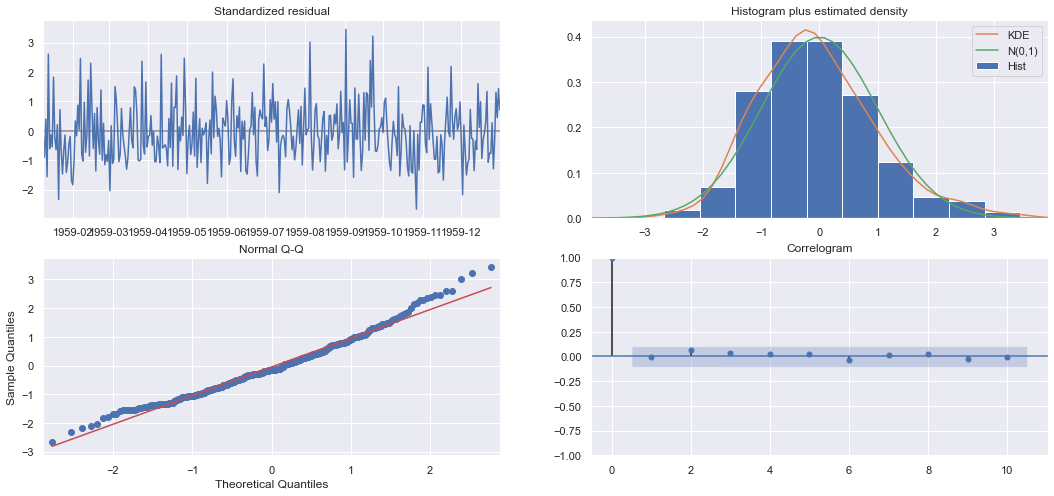

In [25]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [26]:
pred_ci=results.get_prediction(start=pd.to_datetime('1959-12-18'), dynamic=False).conf_int()
pred = results.get_prediction(start=pd.to_datetime('1959-12-18'), dynamic=False).predicted_mean
pred2 = results.predict()[351:]

In [27]:
pred == pred2

# Q: so pred == pred2 == results.fittedvalues[351:] ???

1959-12-18    True
1959-12-19    True
1959-12-20    True
1959-12-21    True
1959-12-22    True
1959-12-23    True
1959-12-24    True
1959-12-25    True
1959-12-26    True
1959-12-27    True
1959-12-28    True
1959-12-29    True
1959-12-30    True
1959-12-31    True
Freq: D, dtype: bool

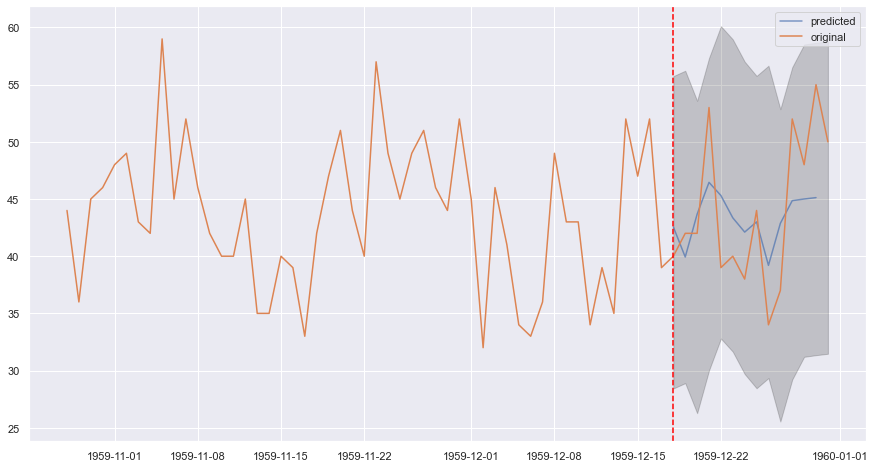

In [28]:
plt.figure(figsize=(15,8))
#plt.plot(results.fittedvalues[351:].shift(-1), alpha=0.7, label='predicted')
plt.plot(pred.shift(-1), alpha=0.7, label='predicted')
plt.plot(df[300:],label='original')
plt.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1]
                ,color='k', alpha=0.2)
plt.axvline(df.index[351], color='red', ls='--')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df[351:], pred)
mse

36.76949280718223

Q: why the predicted line looks like it fits better when pred.shit(-1)

## Try ARIMA model

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
p =d=q = range(0,2)
pdq = list(itertools.product(p, d, q))


In [32]:
for param in pdq:
    try:
        model_arima = ARIMA(df, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 2494.781870986389
(0, 0, 1) 2482.5391348678177
(0, 1, 0) 2650.760238311286
(0, 1, 1) 2463.583732161143
(1, 0, 0) 2479.0806137959353
(1, 0, 1) 2468.905797072839
(1, 1, 0) 2565.2337619058526
(1, 1, 1) 2460.153819638199


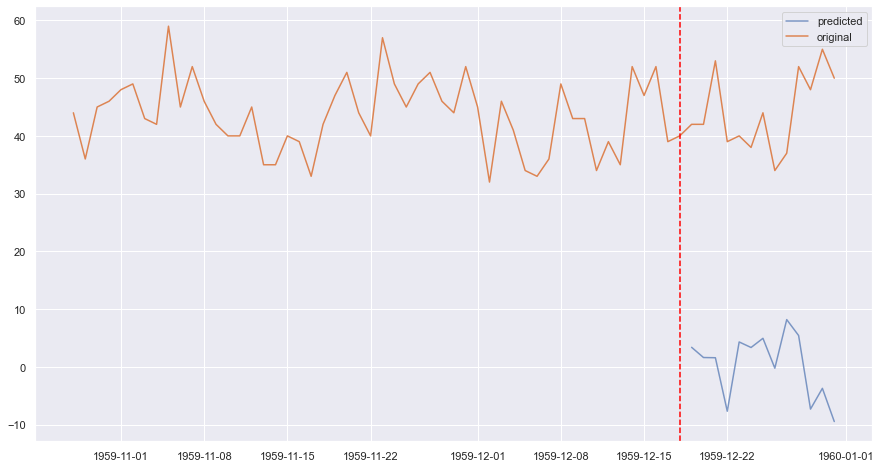

In [33]:
mod = ARIMA(df, order=(1,1,1))    

plt.figure(figsize=(15,8))
plt.plot(mod.fit().predict()[351:], alpha=0.7, label='predicted')
plt.plot(df[300:],label='original')
plt.axvline(df.index[351], color='red', ls='--')
plt.legend()
plt.show()

Q: why when d=1 the value looks so wrong?

## Try ARMA model

In [34]:
from statsmodels.tsa.arima_model import ARMA
p =q = range(0,2)
pq = list(itertools.product(p, q))


In [35]:
for param in pq:
    try:
        model_arima = ARMA(df, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0) 2494.781870986389
(0, 1) 2482.5391348678177
(1, 0) 2479.0806137959353
(1, 1) 2468.905797072839


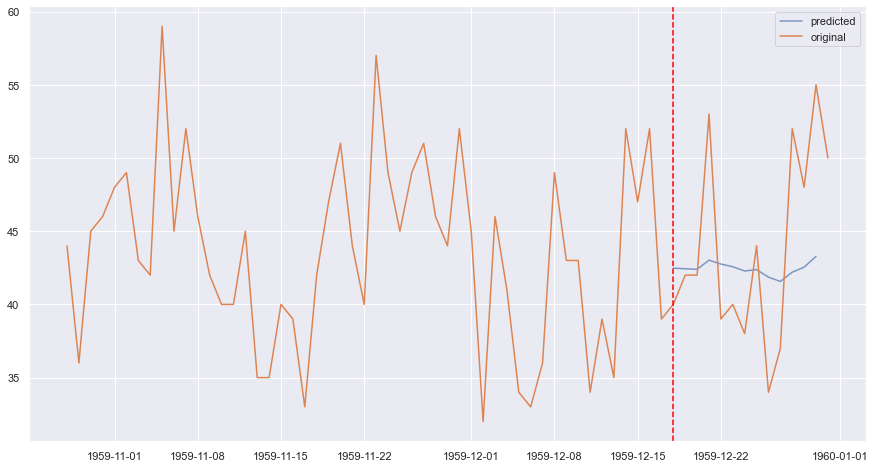

2468.905797072839


In [36]:
mod = ARMA(df, order=(1, 1))    
pred_arma=mod.fit().predict()[351:]

plt.figure(figsize=(15,8))
plt.plot(pred_arma.shift(-1), alpha=0.7, label='predicted')
plt.plot(df[300:],label='original')
plt.axvline(df.index[351], color='red', ls='--')
plt.legend()
plt.show()

print(mod.fit().aic)

In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df[351:], pred_arma)
mse

43.1534541701957

## Try MA model

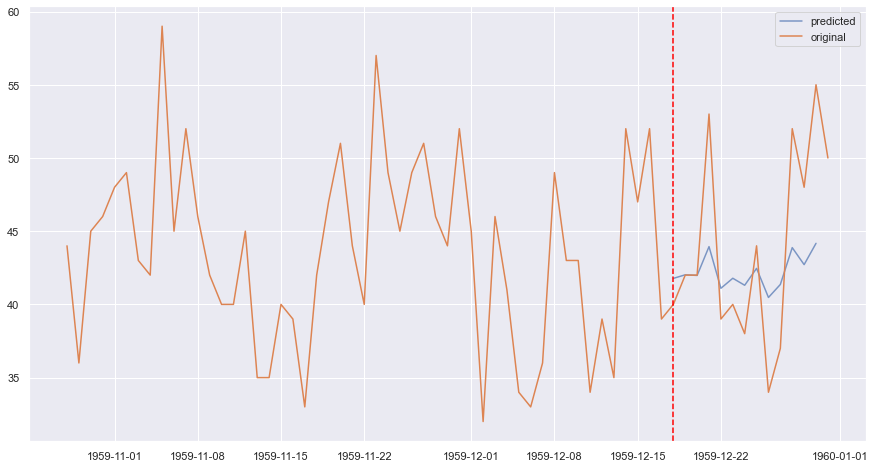

2482.5391348678177


In [38]:
mod_ma = ARMA(df, order=(0,1))
pred_ma = mod_ma.fit().predict() [351:]


plt.figure(figsize=(15,8))
plt.plot(pred_ma.shift(-1), alpha=0.7, label='predicted')
plt.plot(df[300:],label='original')
plt.axvline(df.index[351], color='red', ls='--')
plt.legend()
plt.show()
print(mod_ma.fit().aic)

In [39]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df[351:], pred_ma)
mse

40.63039525188234

## Try AR model

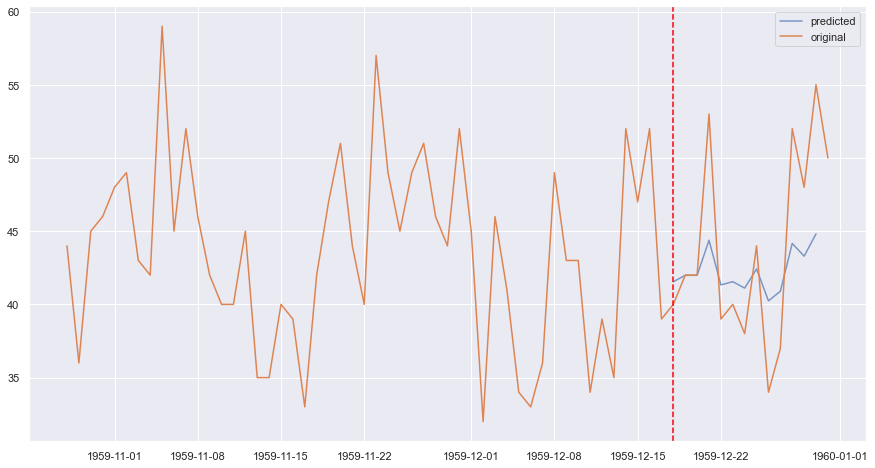

2479.0806137959353


In [40]:
mod_ar = ARMA(df, order=(1,0))
pred_ar =  mod_ar.fit().predict()[351:]


plt.figure(figsize=(15,8))
plt.plot(pred_ar.shift(-1), alpha=0.7, label='predicted')
plt.plot(df[300:],label='original')
plt.axvline(df.index[351], color='red', ls='--')
plt.legend()
plt.show()
print(mod_ar.fit().aic)


In [41]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df[351:], pred_ar)
mse

39.87946854232041

AR model and MA model's prediction looks almost the same:

In [42]:
pred_ma

1959-12-18    41.148641
1959-12-19    41.776280
1959-12-20    42.020848
1959-12-21    41.977264
1959-12-22    43.945342
1959-12-23    41.099669
1959-12-24    41.785007
1959-12-25    41.306453
1959-12-26    42.460997
1959-12-27    40.473144
1959-12-28    41.362030
1959-12-29    43.876773
1959-12-30    42.715780
1959-12-31    44.170152
Freq: D, dtype: float64

In [43]:
pred_ar

1959-12-18    41.331928
1959-12-19    41.549825
1959-12-20    41.985620
1959-12-21    41.985620
1959-12-22    44.382491
1959-12-23    41.331928
1959-12-24    41.549825
1959-12-25    41.114030
1959-12-26    42.421414
1959-12-27    40.242441
1959-12-28    40.896133
1959-12-29    44.164593
1959-12-30    43.293004
1959-12-31    44.818286
Freq: D, dtype: float64

conclusion: sarima model has the lowest MSE (36.77), therefore is the best model among all